In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
from copy import deepcopy
import regex as re

root = "/content/drive/MyDrive/Datasets"
os.chdir(root)

df = pd.read_csv('A1_dataset.csv', sep=',', header=None)
master_dataset = df.values
dataset = deepcopy(master_dataset)
dataset = deepcopy(master_dataset)
print(dataset)

[['LABEL' 'DATE_TIME' 'TEXT']
 ['0' 'Fri Jun 05 14:26:50 2009' 'About to get threaded and scared ']
 ['1' 'Thu May 14 10:13:55 2009'
  '@awaisnaseer I like Shezan Mangooo too!!! I had one yesterday ']
 ...
 ['1' 'Fri May 01 22:00:42 2009'
  'Just returned from the forest! Sarah (my merchy) lost her keys in the woods! what a day! ']
 ['1' 'Sun Jun 07 02:09:46 2009'
  'is proud of her dad and his piece of work. ( http://www.hakkastudy.in.th/) keep it up papa ']
 ['0' 'Fri May 22 04:49:37 2009'
  'Just woke up, gonna eat pizza for breakfast. Also, i have a dentist appointment so im gonna get checked out early. illl miss band though. ']]


In [3]:
#1Aa1
def countSentences(dataset):
    count = 0
    for i in range(1,dataset.shape[0]):
        
        x = re.split(r"[?!.]\s",dataset[i][2])

        # print(dataset[i][2])
        # print(x)
        # print()

        count += len(x)
    return count
    
print("Average number of sentences:",countSentences(dataset)/(dataset.shape[0]-1))

Average number of sentences: 2.0179612782831815


In [4]:
#1Aa2
def countTokens(dataset):
    count = 0
    
    for i in range(1, dataset.shape[0]):
        x = re.sub(r'[?.!,\"\':;-]+', r'.', dataset[i][2]) # replacing multiple "?!." with single "."
        x = re.split(r"\s+",x) #splitting on all spaces
        for j in x: 
            if j == "":
                continue
            y = re.sub(r"\.$", r"`.", j)
            y = re.split(r"`", y)
            for k in y:
                if k != "":
                    # print(k + "-", end ="")
                    count += len(y)
        # print()
        # print(dataset[i][2])
        # print()

    return count

print("Average number of tokens:",countTokens(dataset)/(dataset.shape[0]-1))

Average number of tokens: 17.63424306041521


In [5]:
def wordsWithConsonantsAndVowels(dataset):
    consonants = 0
    vowels = 0
    for i in range(1,dataset.shape[0]):
        x = re.split("\s+", dataset[i][2])
        # print(x)
        for j in x:
            for k in range(min(2, len(j))): #Handles cases like "\'Hey"
                # print(j[k])
                if not re.search(r"[a-zA-z]",j[k]):
                    continue
                elif re.search(r"[bcdfghjklmnqrstvwxyz]", j[k], re.I):
                    consonants += 1
                    # print("C")
                    break
                elif re.search(r"[aeiou]", j[k], re.I):
                    vowels += 1
                    # print("V")
                    break

    return consonants, vowels

print("Total words starting with consonants and vowels respectively are:", wordsWithConsonantsAndVowels(dataset))

Total words starting with consonants and vowels respectively are: (40181, 14631)


In [6]:
def tokenization(dataset):
    count = 0
    lst = ["\?","\.","\!", "\,","\"","\'","\:","\;","\-"]

    for i in range(1, dataset.shape[0]):
        # x = re.sub(r'[?.!,\"\':;-]+', r'.', dataset[i][2]) # replacing multiple "?!." with single "."
        x = re.split(r"\s+",dataset[i][2]) #splitting on all spaces
        # print(x)
        for j in x: 
            if j == "":
                continue
            else:
                count += 1
            for m in lst:
                if m != "\'":
                    y = re.sub(m+"+\s*$", lambda l: r'`'+m[1:]*len(l.group()), j)
                else:
                    y = re.sub(m, lambda l: r'`'+m[:]*len(l.group())+r'`', j)
                y = re.split(r"`", y)
                # print(y)
                if len(y) >= 2:
                    for k in y:
                        if m in k or (m[1:] in k and m[1:] != ""):
                            # print(k)
                            count += 1
        # print()
        # print(dataset[i][2])
        # print()
        # print(count)

    return count
        
print(tokenization(dataset))

64594


In [7]:
def usernames(dataset):
    count = 0
    usernameSet = list()
    for i in range(1, dataset.shape[0]):
        # print(dataset[i][2])
        x = re.findall(r"\W\@\w+", dataset[i][2])
        for j in range(len(x)):
            x[j] = x[j][1:]
        x.extend(re.findall(r"^\@\w+", dataset[i][2]))
        # print(x)
        count += len(x)
        usernameSet.extend(x)

    return count, usernameSet

print("Username count and usernames",usernames(dataset))

Username count and usernames (2106, ['@awaisnaseer', '@Marama', '@gfalcone601', '@mrstessyman', '@GetMeVideo', '@tb78', '@sokendrakouture', '@RealDeal32', '@yoginifoodie', '@mileycyrus', '@flyingbolt', '@SCTunstall', '@digitallearnin', '@IHauntWizards', '@Luke', '@buckhollywood', '@soycamo', '@Liverpool_TX', '@alix_says', '@domkoenig', '@mykiaisosm', '@Cyberela', '@Sally_That_Girl', '@spencerpratt', '@marginatasnaily', '@Bossmobb', '@NewerDeal', '@meggles89', '@ferrite', '@cmrush', '@nachojohnny', '@teambudd1', '@karon', '@IngaDurgin', '@OfficialAS', '@mrskutcher', '@EastCoastGamblr', '@mitchelmusso', '@nessie_111', '@The_Gov', '@nakulshenoy', '@jeddimkins', '@DannyMcEvoy', '@uyennguyen_', '@Peace_P', '@markvanbaale', '@Courtney_182', '@DavidArchie', '@Smithycurt', '@Fashionsourcing', '@alexispratsides', '@chuckiem', '@MicheleKnight', '@jacdo', '@Dj_SportsChick', '@johnny_trouble', '@HisFitness', '@AmazingPhil', '@Wendym00n', '@nathalichristy', '@MATTHARDYBRAND', '@MaryJoRs', '@bedoggt

# Section - II

In [8]:
!sudo apt-get install swig
!pip install -U textblob
!pip install jamspell
!python -m textblob.download_corpora


import nltk
import re
from textblob import TextBlob
import jamspell


nltk.download('popular')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 20 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 1s (940 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fron

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data

True

In [14]:
!wget https://github.com/bakwc/JamSpell-models/raw/master/en.tar.gz
!tar -xvf en.tar.gz

--2022-12-23 22:50:35--  https://github.com/bakwc/JamSpell-models/raw/master/en.tar.gz
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bakwc/JamSpell-models/master/en.tar.gz [following]
--2022-12-23 22:50:36--  https://raw.githubusercontent.com/bakwc/JamSpell-models/master/en.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36611828 (35M) [application/octet-stream]
Saving to: ‘en.tar.gz’

en.tar.gz           100%[===================>]  34.92M  48.0MB/s    in 0.7s    

2022-12-23 22:50:37 (48.0 MB/s) - ‘en.tar.gz’ saved [36611828/36611828]

en.bin


In [9]:
sentances = []
word_tokens = []

def sentanceTokenize(text):
    return nltk.tokenize.sent_tokenize(text)

def wordTokenize(text):
    return nltk.word_tokenize(text)

for (_, _, text) in dataset[1:]:
    sentances.extend(sentanceTokenize(text))

for (_, _, text) in dataset[1:]:
    # print(text)
    word_tokens.extend(wordTokenize(text))


num_consonants = 0
num_vowels = 0

for word in word_tokens:
    if re.search(r"^[aeiou]", word, re.I):
        num_vowels += 1
    elif re.search(r"^[bcdfghjklmnpqrstvwxyz]", word, re.I):
        num_consonants += 1


print("num vowels", num_vowels)
print("num consonants", num_consonants)

print(sentances)
print(word_tokens)



print(len(word_tokens)/(dataset.shape[0]-1))
print(len(sentances)/(dataset.shape[0]-1))
print(len(word_tokens))
print(len(sentances))


num vowels 14059
num consonants 42021
['About to get threaded and scared', '@awaisnaseer I like Shezan Mangooo too!!!', 'I had one yesterday', 'worked on my car after work.', 'showering then going to bed.', 'sooooooooooo tired.', 'sparrow signing out  &lt;Cowboy Up&gt;', '@Marama Actually we start this afternoon!', 'I will try to have something by Wed.', 'It will be a slow process of collecting, many on vac.', "@gfalcone601 Aww Gi.don't worry.we'll vote for you non-stop coz we love you so much", '@mrstessyman What ever you do have a good day.', 'I love knitpicks', '@GetMeVideo Sorry, not my forte,  Ask me about #trading, #scalping the dax and I can answer', "Getting ready for church and bummed I cannot watch Rafa whoop Djokovic LIVE, I'll settle for DVR I suppose", 'Up early tomorrow.', 'Last open home.', 'Goodnight', 'Needs to shake this gloomy feeling!!', "Maybe it's the rain??", '?', 'Minecart ride now.', "Sarah's still too afraid to ride anything fun with me.", '@tb78 Cheers for fo

In [10]:
uniq_words = set(word_tokens)
print(len(uniq_words))

12137


Select two sentances from each class

In [11]:
positive_texts = [text for (label, _, text) in dataset if label == '1']
negative_texts = [text for (label, _, text) in dataset if label == '0']

curr_positive_text = positive_texts[28] + " www.google.com"
curr_negative_text = negative_texts[9] + " hotmail.co.in"

curr_texts = [curr_positive_text, curr_negative_text]

print(curr_positive_text)
print(curr_negative_text)

@cmrush niiice i love asuka...esp on weekdays they have GREAT sushi rolls for super cheap!  hope youre having a great weekend!!! www.google.com
@Luke Oh Luke  , why don't you answer me? pleease try it . Love your music ! Hear it the whole day, really ! hotmail.co.in


Tokenization

In [12]:
sentance_tokens = []

for text in curr_texts:
    sentance_tokens.extend(sentanceTokenize(text))
print("Sentance Tokens:", sentance_tokens)

word_tokens = []

for text in curr_texts:
    word_tokens.extend(wordTokenize(text))
print("Word Tokens:", word_tokens)

Sentance Tokens: ['@cmrush niiice i love asuka...esp on weekdays they have GREAT sushi rolls for super cheap!', 'hope youre having a great weekend!!!', 'www.google.com', "@Luke Oh Luke  , why don't you answer me?", 'pleease try it .', 'Love your music !', 'Hear it the whole day, really !', 'hotmail.co.in']
Word Tokens: ['@', 'cmrush', 'niiice', 'i', 'love', 'asuka', '...', 'esp', 'on', 'weekdays', 'they', 'have', 'GREAT', 'sushi', 'rolls', 'for', 'super', 'cheap', '!', 'hope', 'youre', 'having', 'a', 'great', 'weekend', '!', '!', '!', 'www.google.com', '@', 'Luke', 'Oh', 'Luke', ',', 'why', 'do', "n't", 'you', 'answer', 'me', '?', 'pleease', 'try', 'it', '.', 'Love', 'your', 'music', '!', 'Hear', 'it', 'the', 'whole', 'day', ',', 'really', '!', 'hotmail.co.in']


Spelling Correction

In [15]:
def spellCorrect(text):
    return str(TextBlob(text).correct())

corrector = jamspell.TSpellCorrector()
assert corrector.LoadLangModel('en.bin')

def jamSpellCorrect(text): #being used
    return corrector.FixFragment(text)

for i in range(10):
    print(dataset[i][2])
    print(jamSpellCorrect(dataset[i][2]))

TEXT
TEXT
About to get threaded and scared 
About to get threaded and scared 
@awaisnaseer I like Shezan Mangooo too!!! I had one yesterday 
@awaisnaseer I like Shezan Mango too!!! I had one yesterday 
worked on my car after work. showering then going to bed. sooooooooooo tired. sparrow signing out  &lt;Cowboy Up&gt;
worked on my car after work. showering then going to bed. sooooooooooo tired. sparrow signing out  &lt;Cowboy Up&gt;
@Marama Actually we start this afternoon!  I will try to have something by Wed. It will be a slow process of collecting, many on vac.
@Marama Actually we start this afternoon!  I will try to have something by Wed. It will be a slow process of collecting, many on vac.
@gfalcone601 Aww Gi.don't worry.we'll vote for you non-stop coz we love you so much 
@falcone601 Www Gi.don't worry.we'll vote for you non-stop co we love you so much 
@mrstessyman What ever you do have a good day. I love knitpicks 
@mrstessyman What ever you do have a good day. I love knitpicks

**Stemming**

In [16]:
from nltk.stem.snowball import SnowballStemmer # porter2 


def stemWord(word):
    stemer = SnowballStemmer("english")
    return stemer.stem(word)

stem_words = [stemWord(word) for word in word_tokens]
print(stem_words)


['@', 'cmrush', 'niiic', 'i', 'love', 'asuka', '...', 'esp', 'on', 'weekday', 'they', 'have', 'great', 'sushi', 'roll', 'for', 'super', 'cheap', '!', 'hope', 'your', 'have', 'a', 'great', 'weekend', '!', '!', '!', 'www.google.com', '@', 'luke', 'oh', 'luke', ',', 'whi', 'do', "n't", 'you', 'answer', 'me', '?', 'pleeas', 'tri', 'it', '.', 'love', 'your', 'music', '!', 'hear', 'it', 'the', 'whole', 'day', ',', 'realli', '!', 'hotmail.co.in']


**Lematization**

In [17]:
from nltk.stem import WordNetLemmatizer

def lemmatizeWord(word):
    lemmatizer = WordNetLemmatizer()
    return lemmatizer.lemmatize(word)

lem_words = [lemmatizeWord(word) for word in word_tokens]

print(lem_words)

['@', 'cmrush', 'niiice', 'i', 'love', 'asuka', '...', 'esp', 'on', 'weekday', 'they', 'have', 'GREAT', 'sushi', 'roll', 'for', 'super', 'cheap', '!', 'hope', 'youre', 'having', 'a', 'great', 'weekend', '!', '!', '!', 'www.google.com', '@', 'Luke', 'Oh', 'Luke', ',', 'why', 'do', "n't", 'you', 'answer', 'me', '?', 'pleease', 'try', 'it', '.', 'Love', 'your', 'music', '!', 'Hear', 'it', 'the', 'whole', 'day', ',', 'really', '!', 'hotmail.co.in']


Remove Punctuations

In [18]:
without_punctuation = []

def removePunctuation(text):
    split_text = re.split(r"[\?\.,\'\";:\[\]\(\)!\<\>\{\}]+", text)
    combined_text = ""
    for j in split_text:
        combined_text += (" " + j)
    return combined_text

for text in curr_texts:
    without_punctuation.append(removePunctuation(text))

print(without_punctuation)

[' @cmrush niiice i love asuka esp on weekdays they have GREAT sushi rolls for super cheap   hope youre having a great weekend  www google com', ' @Luke Oh Luke    why don t you answer me  pleease try it   Love your music   Hear it the whole day  really   hotmail co in']


Using Regex to remove stop words

In [19]:
from nltk.corpus import stopwords

def removeStopWords(text, stopWords):
    for word in stopWords:
        text = re.sub(f"\b{word}\b", r"", text, re.I)

    return text

stop_words = set(stopwords.words("english"))
stop_words.add('Im')
without_stop_words = [removeStopWords(text, stop_words) for text in curr_texts]

print(without_stop_words)

['@cmrush niiice i love asuka...esp on weekdays they have GREAT sushi rolls for super cheap!  hope youre having a great weekend!!! www.google.com', "@Luke Oh Luke  , why don't you answer me? pleease try it . Love your music ! Hear it the whole day, really ! hotmail.co.in"]


Using Regex to remove extra whitespace

In [20]:
without_extra_whitespace = []

def removeExtraWhiteSpace(text):
    proc_text = re.sub(r"\s+", r" ", text)
    proc_text = re.sub(r"^\s+", r"", proc_text)
    proc_text = re.sub(r"\s+$", r"", proc_text)
    return proc_text

for text in curr_texts:
    without_extra_whitespace.append(removeExtraWhiteSpace(text))

print("Without exrta whitespace:", without_extra_whitespace)

Without exrta whitespace: ['@cmrush niiice i love asuka...esp on weekdays they have GREAT sushi rolls for super cheap! hope youre having a great weekend!!! www.google.com', "@Luke Oh Luke , why don't you answer me? pleease try it . Love your music ! Hear it the whole day, really ! hotmail.co.in"]


Using Regex to remove URL and HTML tag

In [54]:
without_url = []

def removeUrl(text):
    url_list = re.findall("(^|\s)((https://)?(http://)?([a-zA-Z][\w-]*\.)+([a-zA-Z]\w{1,5})(\/[a-zA-Z0-9-_?!#$%&:+=;]*)*)($|\s)", r""+text)
    # print(text)
    # print(len(url_list))
    for url in url_list:
        # print(url)
        text = re.sub(r""+url[1], "", text, re.S)
    
    return text


def removeHtmlTags(text):
    text = re.sub(r"<.*>", "", text)
    # print(text)
    return text
    

for text in curr_texts:
    without_url.append(removeUrl(text))

# print(without_url)
removeHtmlTags("")

''

Defining preprocessing order (puntctuation removal, regex remove extra white space, regex remove url html, spelling correction, remove stop words, stemming/lemmatization, tokenization)

In [22]:
def textPreProc(text):
    text = removeUrl(text)
    text = removeHtmlTags(text)

    # replacing with actuall ascii for better sentiment analysis of ascii emojis
    text = re.sub(r"&lt;", r"<", text)
    text = re.sub(r"&gt;", r">", text)

    text = removePunctuation(text)
    text = removeExtraWhiteSpace(text)

    # print(text)

    text = jamSpellCorrect(text)
    # text = spellCorrect(text)

    word_tokens = wordTokenize(text)
    # sentannce_tokens = sentanceTokenize(text)

    word_tokens = [lemmatizeWord(word) for word in word_tokens] 
    # word_tokens = [stemWord(word) for word in word_tokens]
    
    word_tokens = [removeStopWords(word, stop_words) for word in word_tokens if not re.search(r"^\s*$", removeStopWords(word, stop_words)) ]
    
    #word re-building
    text = ""
    for word in word_tokens:
        text += " "  + word
    
    text = re.sub(r"^\s*", "", text)

    return (word_tokens, text)


# Section III

Word Cloud

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [24]:
positive_texts = [text for (label, _, text) in dataset if label == '1']
negative_texts = [text for (label, _, text) in dataset if label == '0']

In [55]:
# wordcloud documentation: https://amueller.github.io/word_cloud/index.html
# pre process
positive_text = ""
negative_text = ""

for text in positive_texts:
    # print(text)
    (_, proc_text) = textPreProc(text)
    positive_text += " " + proc_text

for text in negative_texts:
    (_, proc_text) = textPreProc(text)
    negative_text += " " + proc_text

# print(positive_text)
# print(negative_text)

positive_wordCloud = WordCloud(width=800, height=400).generate(positive_text)

negative_wordCloud = WordCloud(width=800, height=400).generate(negative_text)

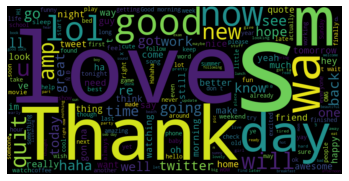

In [44]:
plt.axis("off")
plt.imshow(positive_wordCloud, interpolation='bilinear')

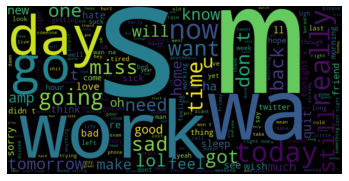

In [45]:
plt.axis("off")
plt.imshow(negative_wordCloud, interpolation='bilinear')

# Section IV

In [46]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [47]:
positive_texts = [text for (label, _, text) in dataset if label == '1']
negative_texts = [text for (label, _, text) in dataset if label == '0']
proc_positive_texts = [textPreProc(text)[1] for text in positive_texts]
proc_negative_texts = [textPreProc(text)[1] for text in negative_texts]


In [48]:
print(positive_texts[0])
print(proc_positive_texts[0])

@awaisnaseer I like Shezan Mangooo too!!! I had one yesterday 
@ awaisnaseer I like Shezan Mango too I had one yesterday


In [49]:
sentimentAnalyzer = SentimentIntensityAnalyzer()
print(positive_texts[0])
score = sentimentAnalyzer.polarity_scores(positive_texts[0])
print(score)

correct_proc_positive = 0
correct_proc_negative = 0
correct_raw_positive = 0
correct_raw_negative = 0

for text in positive_texts:
    score = sentimentAnalyzer.polarity_scores(text)
    if score['compound'] >= 0:
        correct_raw_positive += 1

for text in negative_texts:
    score = sentimentAnalyzer.polarity_scores(text)
    if score['compound'] < 0:
        correct_raw_negative += 1

for text in proc_positive_texts:
    score = sentimentAnalyzer.polarity_scores(text)
    if score['compound'] >= 0:
        correct_proc_positive += 1

for text in proc_negative_texts:
    score = sentimentAnalyzer.polarity_scores(text)
    if score['compound'] < 0:
        correct_proc_negative += 1

print(f"Accuracy unproccesed: {(correct_raw_positive + correct_raw_negative)/(dataset.shape[0] - 1)}")
print(f"Accuracy proccessed: {(correct_proc_positive + correct_proc_negative)/(dataset.shape[0] - 1)}")

# classify 

@awaisnaseer I like Shezan Mangooo too!!! I had one yesterday 
{'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'compound': 0.5229}
Accuracy unproccesed: 0.6834616281782132
Accuracy proccessed: 0.682062048052251
